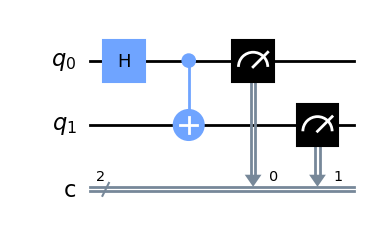

In [1]:
from qiskit import QuantumCircuit

circ = QuantumCircuit(2, 2)
circ.h(0)
circ.cx(0,1)
circ.measure([0, 1], [0, 1])

circ.draw("mpl")

In [3]:
from qiskit import transpile, schedule as build_schedule
from qiskit.providers.fake_provider import FakeHanoi

backend = FakeHanoi()

transpiled_circ = transpile(circ, backend)
schedule =build_schedule(transpiled_circ, backend)

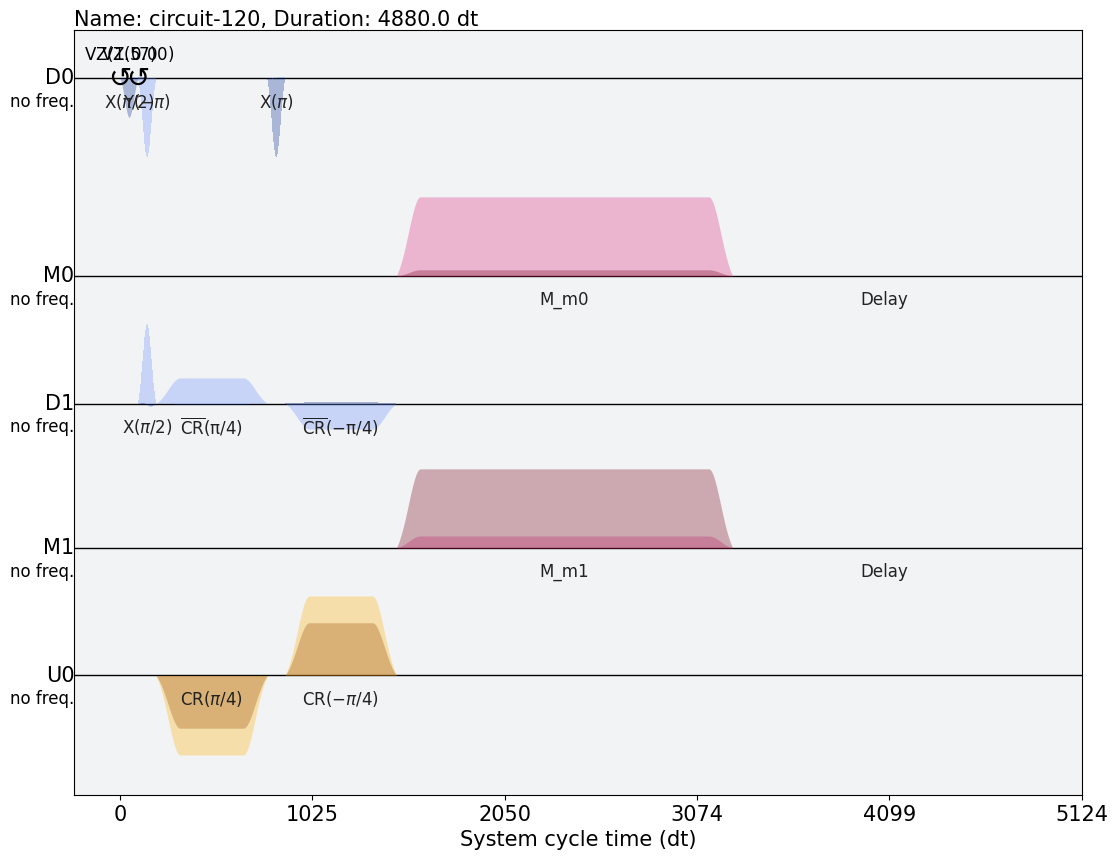

In [5]:
schedule.draw()

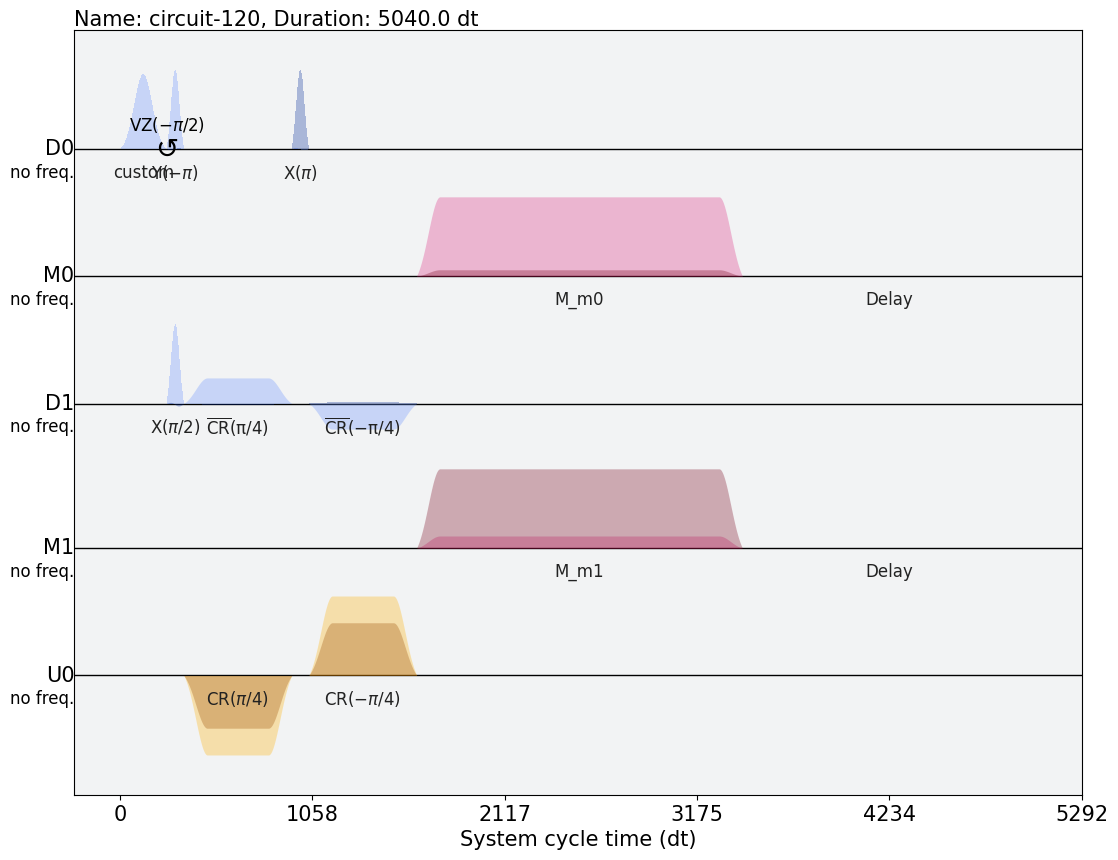

In [8]:
from qiskit import pulse

with pulse.build() as h_q0:
    pulse.play(pulse.library.Gaussian(duration=256, amp=0.3, sigma=50, name='custom'),pulse.DriveChannel(0))
circ.add_calibration('h', [0], h_q0)

schedule =build_schedule(circ, backend)
schedule.draw()

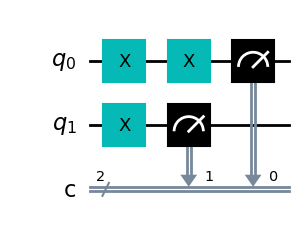

In [9]:
#メソッド

circ = QuantumCircuit(2, 2)
circ.x(0)
circ.x(0)
circ.x(1)
circ.measure([0, 1], [0,1])

circ.draw('mpl')

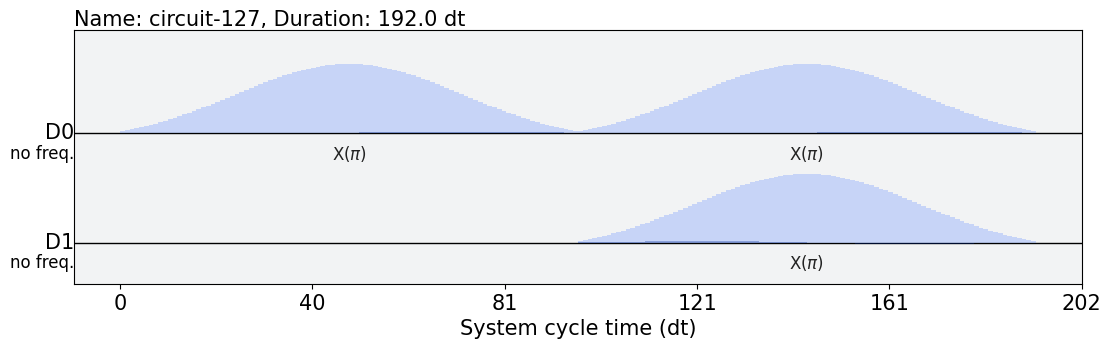

In [12]:
#duration = 160dt

schedule = build_schedule(circ, backend, method="as_late_as_possible")
schedule.filter(channels=[pulse.DriveChannel(0), pulse.DriveChannel(1)]).draw()

In [ ]:
#time = 0

schedule = build_schedule(circ, backend, method="as_soon_as_possible")
schedule.filter(channels=[pulse.DriveChannel(0), pulse.DriveChannel(1